In [1]:
from modules2 import *
from torch.optim import Adam
from  tqdm.notebook import tqdm
import matplotlib.animation as animation
import imageio
import matplotlib.pyplot as plt
import torchvision
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torch. optim.lr_scheduler import ExponentialLR

In [2]:
batch_size = 256
dataset = torchvision.datasets.FashionMNIST(root="C:/Users/ericy/Downloads", train = True, download = True, transform=transforms.Compose([
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Lambda(lambda t: (t * 2) - 1)
]))
loader = DataLoader(dataset=dataset, batch_size=batch_size, shuffle=True)

In [3]:
device = "cuda:0"
model = Unet(time_dim=200, dims=((18, 28), (28, 56), (56, 112)), channels=1)
model = model.to(device)

optimizer = Adam(model.parameters(), lr=1e-3)
scheduler = ExponentialLR(optimizer, gamma=0.99)

In [4]:
time_steps = 200
S = schedule(time_steps, device)

In [5]:
epochs = 5
L = []

for epoch in tqdm(range(epochs), desc="Epoch", position=0):
    for step, (batch, _) in enumerate(tqdm(loader, desc="Batch", position=1, leave=False)):
        optimizer.zero_grad()
        batch = batch.to(device)
        t = torch.randint(0, time_steps, (len(batch),), device=device).long()
        loss = S.loss(model, batch, t)
        loss.backward()
        optimizer.step()
        L.append(loss.detach().cpu())
        if step % 100 == 0:
            print("Epoch:", epoch, "Loss:", loss.item())

Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 0 Loss: 0.4427265226840973
Epoch: 0 Loss: 0.06457194685935974
Epoch: 0 Loss: 0.042314521968364716


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 1 Loss: 0.051154009997844696
Epoch: 1 Loss: 0.046747591346502304
Epoch: 1 Loss: 0.04442841559648514


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 2 Loss: 0.043841682374477386
Epoch: 2 Loss: 0.041361138224601746
Epoch: 2 Loss: 0.03423921763896942


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 3 Loss: 0.04343705251812935
Epoch: 3 Loss: 0.03574308007955551
Epoch: 3 Loss: 0.041445109993219376


Batch:   0%|          | 0/235 [00:00<?, ?it/s]

Epoch: 4 Loss: 0.036483000963926315
Epoch: 4 Loss: 0.040793586522340775
Epoch: 4 Loss: 0.034412931650877


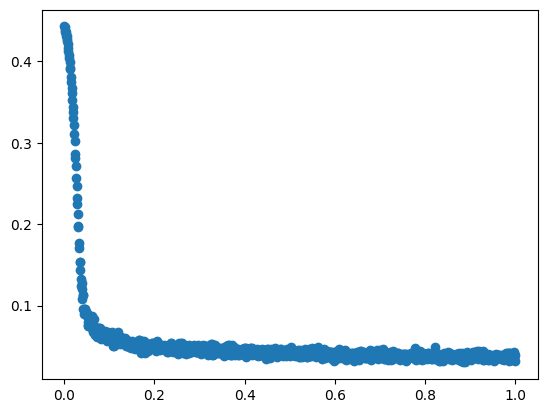

In [6]:
plt.scatter(np.linspace(0,1,len(L)), L)

In [9]:
from annotated import sample

In [31]:
M = sample(model, image_size=28, batch_size=1, channels=1)
N = []
for i in M:
    N.append((np.clip((i[0].reshape(28, 28) + 1)*0.5, 0, 1)*255).astype(np.uint8))
N = np.array(N[::2]).astype(np.uint8)
imageio.mimwrite("output6.gif", N, 'GIF')

sampling loop time step:   0%|          | 0/200 [00:00<?, ?it/s]